In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

### Consider  the function
### $$ f(x_1,x_2) = (x_1-1)^2 +  a(x_2-1)^2 + b e^{-\left(c x_1^2+x_2^2\right)}
$$
where $a = 0.3$, $b=15$ and $c = 0.5$

### a) Plot it on the window $-3 \le x_1 \le 3$ and $-3 \le x_2 \le 3$ with wireframe and contour. Use 40 or 50  contour lines. How many local min do you see?

In [2]:
def f_for_plot(x1,x2):
    a = 0.3
    b = 15.
    c = 0.5
    z = (x1-1)**2 + a*(x2-1)**2 + b*np.exp(-c*x1**2-x2**2)
    return z

In [3]:
x1 = np.linspace(-3,3,20)
x2 = np.linspace(-3,3,20)
X1,X2 = np.meshgrid(x1,x2)

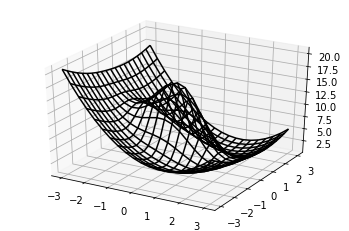

In [4]:
Z = f_for_plot(X1,X2)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, Z, color = 'black')
plt.show()

In [5]:
x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100)
X1,X2 = np.meshgrid(x1,x2)

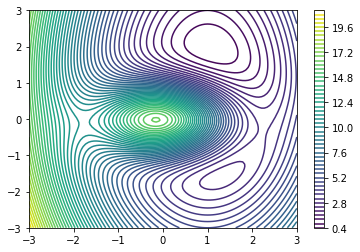

In [6]:
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,50)
plt.colorbar()
plt.show()

### b) Compute  the gradient of 
### $$ f(x_1,x_2) = (x_1-1)^2 +  a(x_2-1)^2 + b e^{-(cx_1^2+x_2^2)}
$$

### Answer:
### \begin{align}
&\frac{\partial f}{\partial x_1}(x_1,x_2)= 2(x_1-1)-  2bc x_1e^{-(x_1^2+x_2^2)}\\
&\frac{\partial f}{\partial x_2}(x_1,x_2)= 2 a(x_2-1)- 2b x_2e^{-(x_1^2+x_2^2)}
\end{align}


In [7]:
def gradf(x):
    a = 0.3
    b = 15.
    c = 0.5
    dfdx1 = 2*(x[0]-1) - 2*b*c*x[0] *np.exp(-c*x[0]**2 - x[1]**2)
    dfdx2 = 2*a*(x[1]-1) - 2*b * x[1] *np.exp(-c*x[0]**2 - x[1]**2)
    g = np.array([dfdx1,dfdx2])
    return g

### c) Do a gradient descent and plot the iterates on the coutour lines of the function.  Start with initial guess $x_1 = 0.0$ and $x_2 = 0.0$ and choose the step size to be $\alpha = 0.05$

In [8]:
def grad_desc_store(gradf,alpha,x0,num_iter):
    x = x0
    iterates = np.zeros( (num_iter,2))
    
    for i in range(0,num_iter):
        iterates[i,:] = x
        x = x - alpha*gradf(x)
        
    return iterates

In [9]:
x0 = np.array([0.,0.])
alpha = 0.05
num_iter=50
iterates = grad_desc_store(gradf,alpha,x0,num_iter)

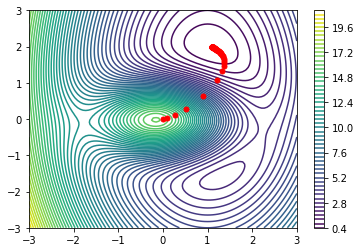

In [10]:
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,50)
plt.plot(iterates[:,0],iterates[:,1],'ro', markersize=5)
plt.colorbar()
plt.show()

### d) Do a gradient descent and plot the iterates on the coutour lines of the function.  Start with initial guess $x_1 = -0.1$ and $x_2 = -0.1$ and choose the step size to be $\alpha = 0.05$

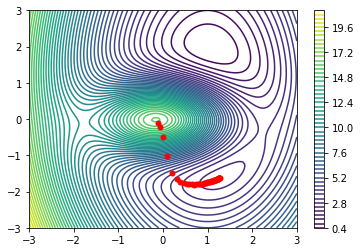

In [11]:
x0 = np.array([-0.1,-0.1])
alpha = 0.05
num_iter=50
iterates = grad_desc_store(gradf,alpha,x0,num_iter)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,50)
plt.plot(iterates[:,0],iterates[:,1],'ro', markersize=5)
plt.colorbar()
plt.show()

### e) Find the coordinates of these two local minimima as well as the value of the functions there. Which one is the global minima? 

In [12]:
x0 = np.array([-0.0,-0.0])
alpha = 0.05
num_iter = 50
iterates = grad_desc_store(gradf,alpha,x0,num_iter)
sln = iterates[-1,:] # get the last iterate
print('(x1,x2)=',sln)
print('f(x1,x2)=',f_for_plot(sln[0],sln[1]))

(x1,x2)= [1.09515907 1.99604387]
f(x1,x2)= 0.4599143649886262


In [13]:
x0 = np.array([-0.1,-0.1])
alpha = 0.05
num_iter = 50
iterates = grad_desc_store(gradf,alpha,x0,num_iter)
sln = iterates[-1,:]
print('(x1,x2)=',sln)
print('f(x1,x2)=',f_for_plot(sln[0],sln[1]))

(x1,x2)= [ 1.27143338 -1.62662511]
f(x1,x2)= 2.6176218519934777


### f) Do a gradient descent and plot the iterates on the coutour lines of the function.  Start with initial guess $x_1 = -2$ and $x_2 = 0$ and choose the step size to be $\alpha = 0.05$

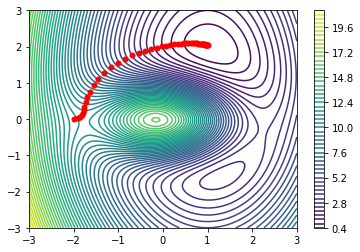

In [14]:
x0 = np.array([-2,0])
alpha = 0.05
num_iter=50
iterates = grad_desc_store(gradf,alpha,x0,num_iter)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,50)
plt.plot(iterates[:,0],iterates[:,1],'ro', markersize=5)
plt.colorbar()
plt.show()